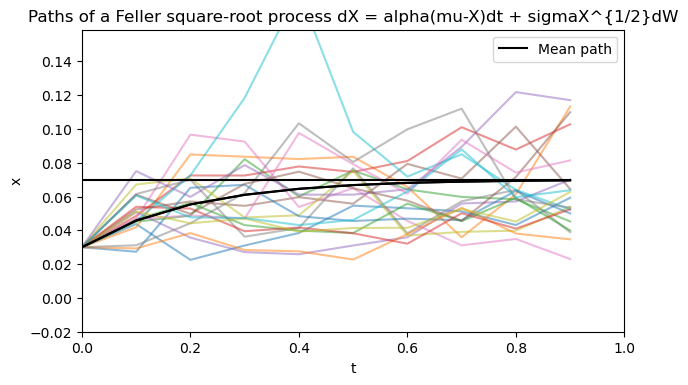

Text(0.5, 1.0, 'Probability density function of a Feller square-root process at different times')

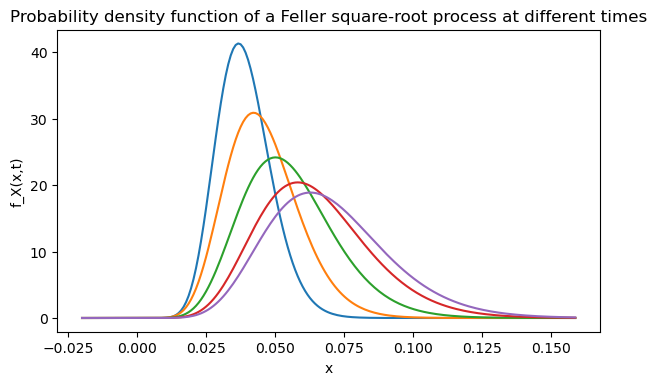

In [1]:
#!/usr/bin/python3
#Cox_Ingersoll_Ross_Model.ipynb
#Parth Parakh
#purpose: Simulate a Feller square-root process
#dX = alpha*(mu-X)*dt + sigma*sqrt(X)*dW
#Used in the Cox-Ingersoll-Ross model and in the Heston stochastic volatility model

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 10;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
alpha = 5; mu = 0.07; sigma = 0.265; #model parameters
X0 = 0.03;

X = np.zeros(npaths*nsteps).reshape(nsteps,npaths);
X[0,:] = 0.03;
N = np.random.normal(0,1,(nsteps,npaths));

#Degrees of freedom of the non-central chi square distribution
d = (4*alpha*mu)/(sigma**2); # exact method
  
# pg 111 eq5.6 - Tools from Stochastic Analysis for Mathematical Finance
k = (sigma**2)*((1-np.exp(-alpha*dt))/(4*alpha)); # exact method

for i in range(0,nsteps-1):   
    #X[i+1,:] = X[i,:] + alpha*(mu-X[i,:])*dt + sigma*np.sqrt(X[i,:]*dt)*N[i,:]; # plain Euler-Maruyama eq 5.3 pg110
    lambdaa = (4*alpha*X[i,:])/((sigma**2)*(np.exp(alpha*dt)-1)); #exact method
    #print(lambdaa)
    X[i+1,:] = (ncx2.ppf(np.random.rand(1,npaths),df=d,nc=lambdaa))*k;
    
EX = mu + (X0-mu)*np.exp(-alpha*t);

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(X,axis=1),'black');
plt.plot(t,mu*np.ones(len(t)),'black')
sdevinfty = sigma*np.sqrt(mu/(2*alpha));
plt.ylim(-0.02,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a Feller square-root process dX = alpha(mu-X)dt + sigmaX^{1/2}dW')
plt.show()

t2 = np.array([0.05,0.1,0.2,0.4,1]);
x = np.linspace(-0.02,mu+4*sdevinfty,200);
k = (sigma**2)*(1-np.exp(-alpha*t2))/(4*alpha);
d = 4*alpha*mu/sigma**2;
lambdaa = (4*alpha*X0)/((sigma**2)*(np.exp(alpha*t2)-1)); # non-centrality parameter
f = np.zeros(len(x)*len(t2)).reshape(len(x),len(t2));
for i in range(len(t2)):
    f[:,i] = ncx2.pdf(x/k[i],d,lambdaa[i])/k[i];
plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f_X(x,t)')
#plt.legend('t = 0.05','t = 0.10','t = 0.20','t = 0.40','t = 1.00')
plt.title('Probability density function of a Feller square-root process at different times')